In [4]:
#Euler
def euler(f,t0,y0,h,tN):
    steps=int((tN-t0)/h) +1 
    ys=[y0]
    ts=[t0]
    for _ in range(steps):
        k1=h*f(t0,y0)
        y0+=k1
        t0+=h
        ys.append(y0)
        ts.append(t0)
    return ts,ys

In [6]:
#Improved Euler
def improved_euler(f,t0,y0,h,tN):
    steps=int((tN-t0)/h) +1 
    ys=[y0]
    ts=[t0]
    for _ in range(steps):
        k1=h*f(t0,y0)
        k2=h*f(t0+h/2,y0+k1/2)
        y0+=k2
        t0+=h
        ys.append(y0)
        ts.append(t0)
    return ts,ys

In [8]:
#Runge-Kutta 4th order
def runge_kutta_4(f,t0,y0,h,tN):
    steps=int((tN-t0)/h) +1 
    ys=[y0]
    ts=[t0]
    for _ in range(steps):
        k1=h*f(t0,y0)
        k2=h*f(t0+h/2,y0+k1/2)
        k3=h*f(t0+h/2,y0+k2/2)
        k4=h*f(t0+h,y0+k3)
        y0+=1/6 * (k1+2*k2+2*k3+k4)
        t0+=h
        ys.append(y0)
        ts.append(t0)
    return ts,ys

In [3]:
#Systems
def RK4_system(f:list,t0:float,y0:list,h:float,tN:float):
    steps=int((tN-t0)/h) +1 
    ys=[y0]
    ts=[t0]
    for _ in range(steps):

        k1=[h*fi(t0,*y0) for fi in f]
        y0new=[yi+ki/2 for yi,ki in zip(y0,k1)]
        
        k2=[h*fi(t0+h/2,*y0new) for fi in f]
        y0new=[yi+ki/2 for yi,ki in zip(y0,k2)]
        
        k3=[h*fi(t0+h/2,*y0new) for fi in f]
        y0new=[yi+ki for yi,ki in zip(y0,k3)]
        
        k4=[h*fi(t0+h,*y0new) for fi in f]

        y0 = [y0i + 1/6 * (k1i+2*k2i+2*k3i+k4i) for y0i,k1i,k2i,k3i,k4i in zip(y0,k1,k2,k3,k4)]
        t0+=h
        ys.append(y0)
        ts.append(t0)
    return ts,ys

In [9]:
def f1(t,x,y):
    return 2*x+6*y
def f2(t,x,y):
    return -2*x-5*y
f=[f1,f2]
t0=0
y0=[1,0]
h=0.1
tN=10

In [15]:
RK4_system(f,t0,y0,h,tN)

([0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999,
  1.0999999999999999],
 [[1, 0],
  [1.16315, -0.17220833333333332],
  [1.2639507922916666, -0.2968132605902778],
  [1.3168232133015998, -0.3840031942002814],
  [1.3332772703480353, -0.4419713209536965],
  [1.3224680233176138, -0.47729139259615594],
  [1.2916480156218935, -0.49522405416371895],
  [1.2465352623882742, -0.49996642914469674],
  [1.1916123339900422, -0.494855362837076],
  [1.1303692344548133, -0.4825328288364917],
  [1.0655004523584635, -0.4650804519639766],
  [0.9990646626648574, -0.4441288315232588]])

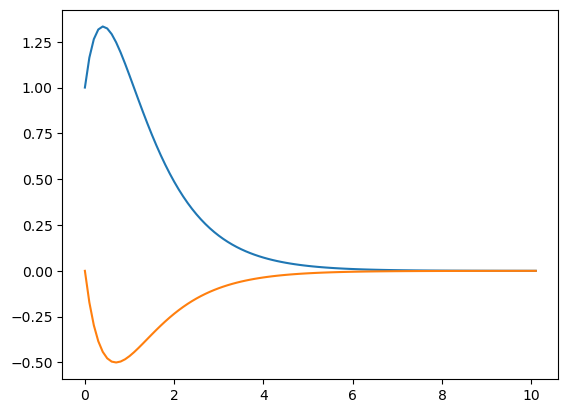

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t,x=RK4_system(f,t0,y0,h,tN)
x=np.array(x)
t=np.array(t)

plt.plot(t,x[:,0])
plt.plot(t,x[:,1])